# Проект: Выбор локации для скважины

## Легенда

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [ ]:
%%capture
!pip install fast_ml

In [27]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import re

from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

from fast_ml import eda

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    f1_score, 
    accuracy_score, 
    recall_score, 
    precision_score
)
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier

RANDOM_STATE = 62

In [28]:
data = {}

In [29]:
def data_preparation(number_file):
    name_region = number_file + 1
    try:
        data[name_region] = pd.read_csv(
    f'C:\\Users\\m5612\\Downloads\\geo_data_{number_file}.csv')
    except:
        pass

    print('Датафрейм:')
    display(data[name_region].head())
    
    print('\nОписание:')
    display(data[name_region].describe())
    
    print('\nИнфо:')
    display(eda.df_info(data[name_region]))
    
    print('\nКорреляция:')
    display(data[name_region].corr())
    
    print('\nУдалим столбец id:')
    data[name_region].drop(columns='id', inplace=True)
    display(data[name_region].head(1))

    print('\nГистограмма:')
    data[name_region].hist(figsize=(15, 15), bins=100);

#### Регион 0

Датафрейм:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Описание:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



Инфо:


,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
id,object,Categorical,99990,"[txEyH, 2acmU, 409Wp, iJLyR, Xdl7t, wX4Hy, tL6...",0,0.0
f0,float64,Numerical,100000,"[0.7057449842080644, 1.3347112926051892, 1.022...",0,0.0
f1,float64,Numerical,100000,"[-0.4978225001976334, -0.3401642528583136, 0.1...",0,0.0
f2,float64,Numerical,100000,"[1.22116994843607, 4.3650803324282, 1.41992623...",0,0.0
product,float64,Numerical,100000,"[105.28006184349584, 73.03775026515737, 85.265...",0,0.0



Корреляция:


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000



Удалим столбец id:


,f0,f1,f2,product
0,0.705745,-0.497823,1.22117,105.280062



Гистограмма:


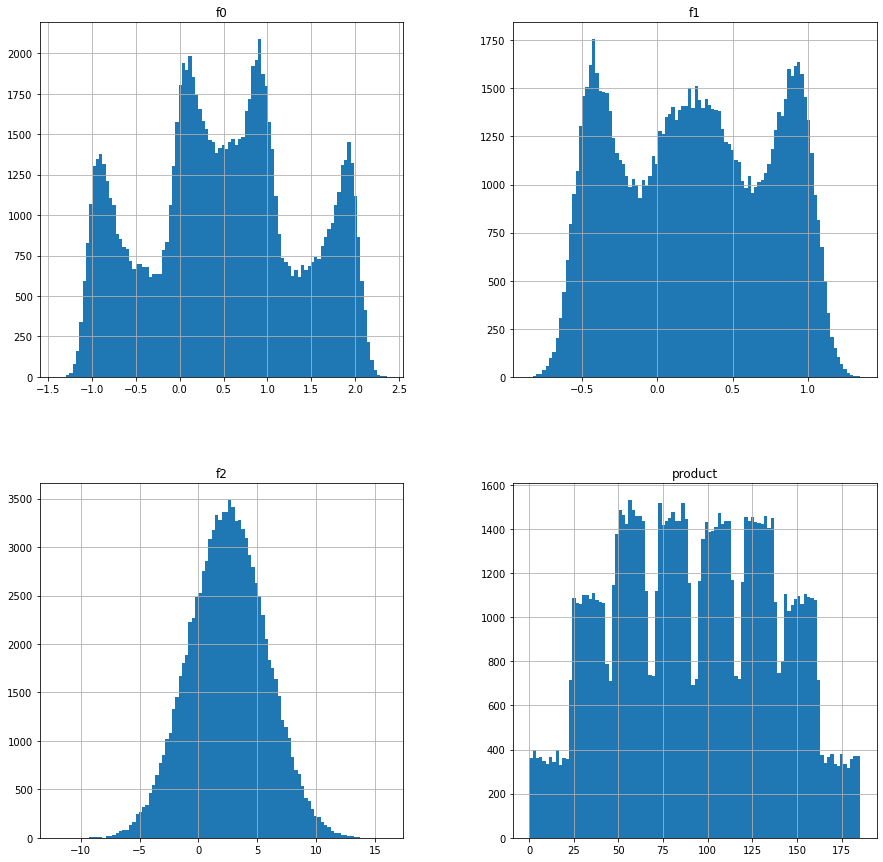

In [30]:
data_preparation(0)

#### Регион 1

Датафрейм:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Описание:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



Инфо:


,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
id,object,Categorical,99996,"[kBEdx, 62mP7, vyE1P, KcrkZ, AHL4O, HHckp, h5U...",0,0.0
f0,float64,Numerical,100000,"[-15.00134818249185, 14.272087811011149, 6.263...",0,0.0
f1,float64,Numerical,100000,"[-8.275999947188001, -3.47508321506002, -5.948...",0,0.0
f2,float64,Numerical,100000,"[-0.0058760136933206, 0.9991827365665829, 5.00...",0,0.0
product,float64,Numerical,12,"[3.179102583207246, 26.95326103153969, 134.766...",0,0.0



Корреляция:


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000



Удалим столбец id:


,f0,f1,f2,product
0,-15.001348,-8.276,-0.005876,3.179103



Гистограмма:


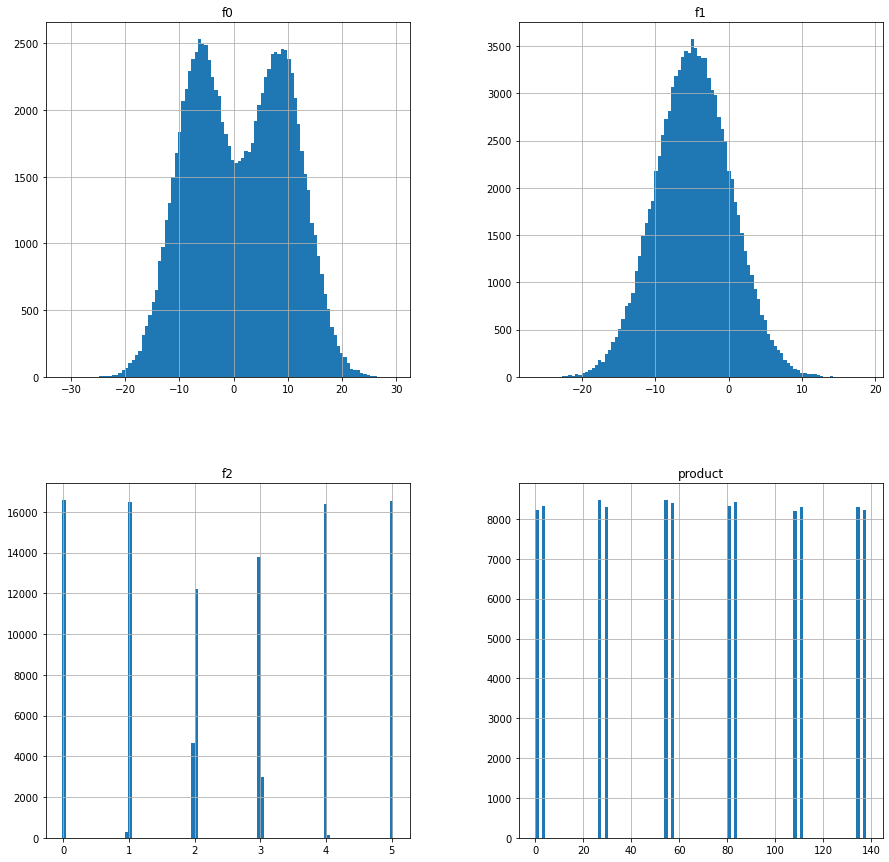

In [31]:
data_preparation(1)

#### Регион 2

Датафрейм:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Описание:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838



Инфо:


,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
id,object,Categorical,99996,"[fwXo0, WJtFt, ovLUW, q6cA6, WPMUX, LzZXx, WBH...",0,0.0
f0,float64,Numerical,100000,"[-1.1469870984179529, 0.2627779016539684, 0.19...",0,0.0
f1,float64,Numerical,100000,"[0.9633279217162892, 0.2698389572803021, 0.289...",0,0.0
f2,float64,Numerical,100000,"[-0.8289649221710994, -2.530186515492004, -5.5...",0,0.0
product,float64,Numerical,100000,"[27.75867323073004, 56.06969663239464, 62.8719...",0,0.0



Корреляция:


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000



Удалим столбец id:


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673



Гистограмма:


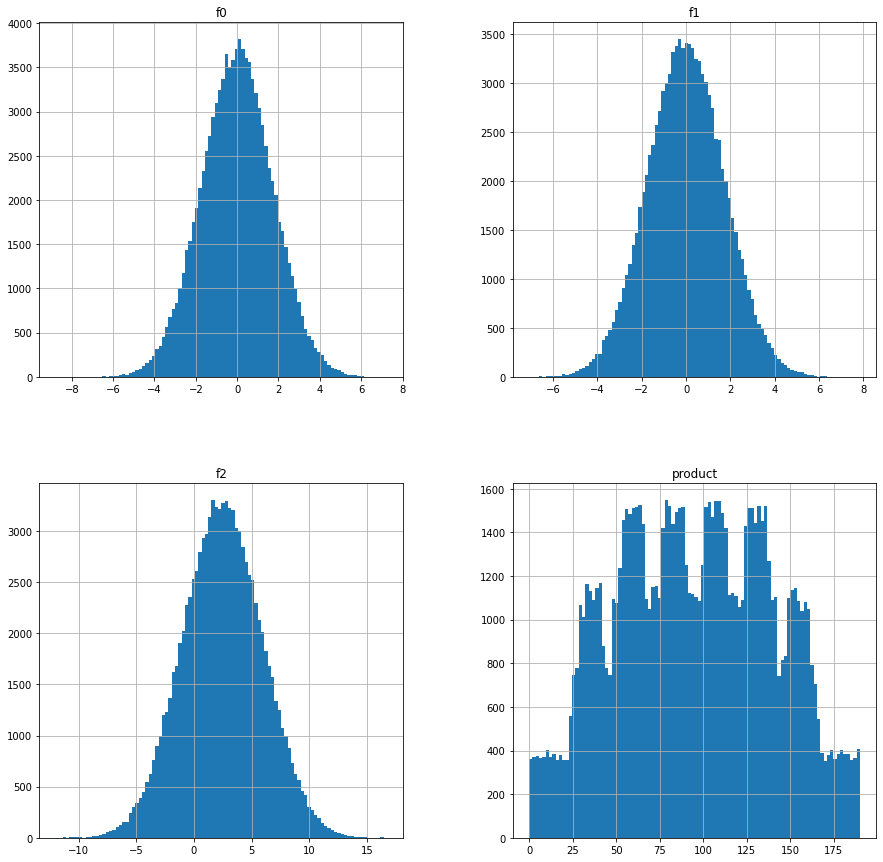

In [32]:
data_preparation(2)

Посмотрим на необычные столбцы в регионе 2:

In [33]:
data[2]['product'].sort_values().unique()

array([  0.        ,   3.17910258,  26.95326103,  30.13236361,
        53.90652206,  57.08562465,  80.85978309,  84.03888568,
       107.81304413, 110.99214671, 134.76630516, 137.94540774])

In [34]:
data[2].sort_values('f2')

,f0,f1,f2,product
39883,-12.413771,-4.156430,-0.018144,3.179103
8890,-7.158662,-9.143824,-0.017887,3.179103
71735,7.568092,-6.483928,-0.017686,0.000000
17969,-9.129885,-3.351751,-0.016988,3.179103
57099,6.115644,-2.399228,-0.016636,0.000000
...,...,...,...,...
55499,-7.968402,-8.487218,5.016737,137.945408
19697,12.128382,-5.670456,5.016804,134.766305
21507,15.905863,5.014246,5.017503,134.766305
6345,-6.156347,4.864559,5.019091,137.945408


### Выводы:

Целевым признаком в нашем датасете является колонка `product`.

Пропуски отсутствуют.

Во втором датасете обнаружено незначительное количество дубликатов в колонке `id`, между колонкой f2 и целевым признаком очень сильная корреляция, а также на гистограмме выявлены необычные набора данных в столбцах `f2` и `product`. Данные синтетические, сделать анализ аномалий мы не можем.

Столбец `id` мы удалили, он не несет полезной для нашей цели информации.

## Обучение и проверка модели

In [35]:
X_train, X_valid, y_train, y_valid, data_valid = {}, {}, {}, {}, {}

In [36]:
def data_learn(region):
    features = data[region].drop(['product'], axis=1)
    target = data[region]['product']

    X_train[region], X_valid[region], y_train[region], y_valid[region] = train_test_split(
        features, target, test_size=.25, random_state=RANDOM_STATE)
    
    model = LinearRegression()
    model.fit(X_train[region], y_train[region])
    predictions = model.predict(X_valid[region])
    
    data_valid[region] = X_valid[region]
    data_valid[region]['prediction'] = predictions
    data_valid[region]['product'] = y_valid[region]
    print(f'Регион № {region}:')
    print(f'Cредний запас предсказанного \
сырья: {predictions.mean():.2f}')
    
    rmse = mean_squared_error(y_valid[region], predictions)**0.5
    print(f'RMSE на валидационной выборке: {rmse:.2f}')   

In [37]:
data_learn(1)

Регион № 1:
Cредний запас предсказанного сырья: 92.44
RMSE на валидационной выборке: 37.98


In [38]:
data_learn(2)

Регион № 2:
Cредний запас предсказанного сырья: 68.82
RMSE на валидационной выборке: 0.89


In [39]:
data_learn(3)

Регион № 3:
Cредний запас предсказанного сырья: 95.07
RMSE на валидационной выборке: 40.03


### Анализ результатов

В регионе №1 наименьший запас и совсем небольшой RMSE.  
Лучший результат по запасам предсказанного сырья в регионе №2, но и самое большое значение RMSE. 

## Подготовка к расчёту прибыли

Ключевые значения для расчётов:

In [40]:
#Бюджет на разработку скважин в регионе (млн.руб.):
BUDGET = 10000 

#Доход с каждой единицы продукта (млн.руб./тыс.баррелей):
REVENUE_PER_UNIT = .45

#500 случайных скважин для отбора лучших:
WELLS_500 = 500

#200 лучших скважин для разработки:
BEST_200 = 200

#вероятность убытков:
LOSS_PROBABILITY_MAX = .025

In [41]:
#Объём сырья для безубыточной разработки новой скважины:
min_volume_oil = BUDGET / BEST_200 / REVENUE_PER_UNIT
print(f'Объём сырья для безубыточной разработки новой скважины, тыс.баррелей: {min_volume_oil:.2f}')

Объём сырья для безубыточной разработки новой скважины, тыс.баррелей: 111.11


% среднего запаса сырья в регионах к объёму сырья для безубыточной разработки новой скважины:

In [42]:
print(f'Регион №1: {data[1]["product"].mean()/min_volume_oil:.1%}')
print(f'Регион №2: {data[2]["product"].mean()/min_volume_oil:.1%}')
print(f'Регион №3: {data[3]["product"].mean()/min_volume_oil:.1%}')

Регион №1: 83.3%
Регион №2: 61.9%
Регион №3: 85.5%


#### Выводы:

Среднего запаса сырья в каждом регионе не хватает для безубыточной разработки.

## Функция для расчета прибыли

In [43]:
def income(well_500):

    top_200 = well_500.sort_values(by='prediction', ascending=False).head(BEST_200)
    income_fact = top_200['product'].sum() * REVENUE_PER_UNIT
    profit = income_fact - BUDGET
    
    return profit

## Расчёт прибыли и рисков 

Применим технику Bootstrap, чтобы найти распределение прибыли.

In [44]:
def bootstrap(region):
    state = np.random.RandomState(12345)    
    bootstrap_values = []
    for _ in range(1000):
        well_500 = data_valid[region].sample(n=WELLS_500, replace=True, 
                                          random_state=state)
        bootstrap_values.append(income(well_500))

    bootstrap_values = pd.Series(bootstrap_values)
    lower = bootstrap_values.quantile(0.025)
    upper = bootstrap_values.quantile(0.975)
    risk_of_loss = bootstrap_values[bootstrap_values<0].count() / bootstrap_values.count()

    mean = bootstrap_values.mean()
    
    bootstrap_values.hist(bins=100, figsize=(12, 5))
    
    plt.xlabel('Прибыль')
    plt.ylabel('Количество выборок')
    plt.title('Распределение прибыли')
    plt.show()   
    
    print(f'Средняя прибыль, млн.руб: {mean:.2f}')
    print(f'95%-й доверительный интервал, млн.руб: {lower:.2f}, {upper:.2f}')
    print(f'Риск убытков: {risk_of_loss:.2%}')
    print(f'Риск убытков выше 2.5%, регион №{region} отвергаем.') \
    if risk_of_loss > LOSS_PROBABILITY_MAX else ""

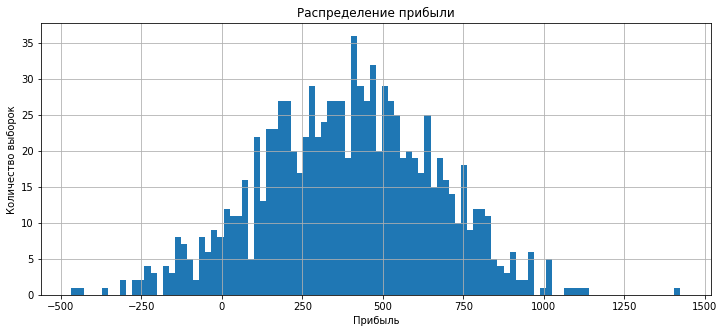

Средняя прибыль, млн.руб: 391.87
95%-й доверительный интервал, млн.руб: -140.69, 898.12
Риск убытков: 7.60%
Риск убытков выше 2.5%, регион №1 отвергаем.


In [45]:
bootstrap(1)

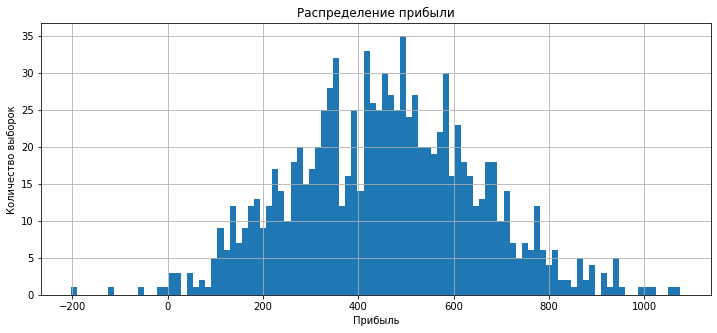

Средняя прибыль, млн.руб: 457.53
95%-й доверительный интервал, млн.руб: 110.89, 857.93
Риск убытков: 0.50%


In [46]:
bootstrap(2)

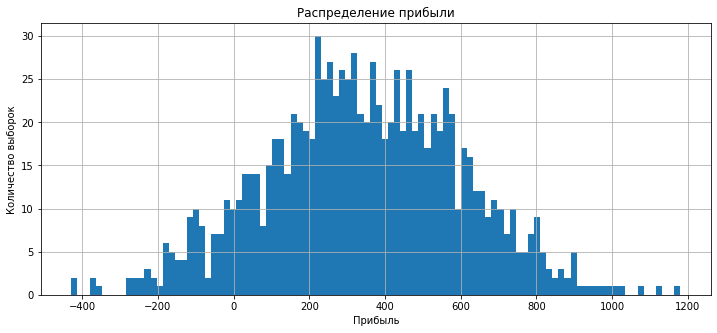

Средняя прибыль, млн.руб: 341.37
95%-й доверительный интервал, млн.руб: -162.28, 826.85
Риск убытков: 9.70%
Риск убытков выше 2.5%, регион №3 отвергаем.


In [47]:
bootstrap(3)

## Выводы:

В результате применения техники bootstrap мы выявили единственный подходящий по условиям (после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%) регион №2. Также второй регион лидирует по средней прибыли, и у него единственного нижний квантиль положителен.